# Exploration Notebook for Krafthack 2022 - Tietoevry - Ilmari Vikström & Lina Fredriksson & Sturla Winther Johnsen

### Run imports

In [3]:
import pandas as pd
import numpy as np
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import random
import seaborn as sn
import sklearn

### Load input data from files

In [4]:
# Load input datasets.
input_dataset_1 = pd.read_parquet('input/input_dataset-1.parquet')
input_dataset_2 = pd.read_parquet('input/input_dataset-2.parquet')
prediction_dataset = pd.read_parquet('input/prediction_input.parquet')

In [5]:
# Define Tensile column names.
tensile_columns = ['Bolt_1_Tensile', 'Bolt_2_Tensile', 'Bolt_3_Tensile', 'Bolt_4_Tensile', 'Bolt_5_Tensile', 'Bolt_6_Tensile']

In [6]:
# Load pretensions from the file
pretensions = pd.read_csv('input/bolt_pretension.csv', header=None)
pretensions
bolt_tension_list = pretensions[1].values.tolist()
bolt_pretensions = {}

for i in range(0, len(tensile_columns)):
    bolt_pretensions[tensile_columns[i]] = bolt_tension_list[i]

### Describe raw datasets

In [7]:
print(f'Columns of input_dataset_1: {input_dataset_1.columns.tolist()}')
print(f'Shape of input_dataset_1: {input_dataset_1.shape}')
print(f'Columns of input_dataset_2: {input_dataset_2.columns.tolist()}')
print(f'Shape of input_dataset_2: {input_dataset_2.shape}')
print(f'Columns of prediction_dataset: {prediction_dataset.columns.tolist()}')
print(f'Shape of prediction_dataset: {prediction_dataset.shape}')

pd.options.display.float_format = '{:.2f}'.format

display(input_dataset_1.describe())
display(input_dataset_2.describe())
display(prediction_dataset.describe())

Columns of input_dataset_1: ['Unit_4_Power', 'Unit_4_Reactive Power', 'Turbine_Guide Vane Opening', 'Turbine_Rotational Speed', 'Turbine_Pressure Drafttube', 'Turbine_Pressure Spiral Casing', 'Bolt_1_Steel tmp', 'Bolt_1_Torsion', 'Bolt_1_Tensile', 'Bolt_2_Torsion', 'Bolt_2_Tensile', 'Bolt_3_Torsion', 'Bolt_3_Tensile', 'Bolt_4_Torsion', 'Bolt_4_Tensile', 'Bolt_5_Torsion', 'Bolt_5_Tensile', 'Bolt_6_Torsion', 'Bolt_6_Tensile', 'mode']
Shape of input_dataset_1: (8607446, 20)
Columns of input_dataset_2: ['Unit_4_Power', 'Unit_4_Reactive Power', 'Turbine_Guide Vane Opening', 'Turbine_Pressure Drafttube', 'Turbine_Pressure Spiral Casing', 'Turbine_Rotational Speed', 'mode', 'Bolt_1_Steel tmp', 'Bolt_1_Tensile', 'Bolt_2_Tensile', 'Bolt_3_Tensile', 'Bolt_4_Tensile', 'Bolt_5_Tensile', 'Bolt_6_Tensile', 'Bolt_1_Torsion', 'Bolt_2_Torsion', 'Bolt_3_Torsion', 'Bolt_4_Torsion', 'Bolt_5_Torsion', 'Bolt_6_Torsion', 'lower_bearing_vib_vrt', 'turbine_bearing_vib_vrt']
Shape of input_dataset_2: (1874087, 

,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Rotational Speed,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Bolt_1_Steel tmp,Bolt_1_Torsion,Bolt_1_Tensile,Bolt_2_Torsion,Bolt_2_Tensile,Bolt_3_Torsion,Bolt_3_Tensile,Bolt_4_Torsion,Bolt_4_Tensile,Bolt_5_Torsion,Bolt_5_Tensile,Bolt_6_Torsion,Bolt_6_Tensile
count,8607446.00,8607446.00,8607446.00,8607446.00,8607446.00,8607446.00,8607446.00,8607446.00,8607446.00,8607446.00,8607446.00,8607446.00,8607446.00,8607446.00,8607446.00,8607446.00,8607446.00,8607446.00,8607446.00
mean,289.58,8.85,89.99,107.96,169.20,4930.32,8.17,162.95,1506.05,139.78,1448.71,146.61,1632.26,224.27,1597.80,288.29,1630.48,163.17,1645.10
std,33.47,17.46,8.67,2.69,25.14,1249.92,1.32,4.42,27.89,7.64,12.99,2.83,23.46,3.21,3.42,6.06,7.44,4.36,14.52
min,0.00,-94.68,0.00,0.00,105.78,111.11,5.42,153.16,1381.21,128.90,1363.85,143.17,1545.34,214.09,1534.80,270.41,1523.48,149.80,1503.09
25%,284.42,-0.19,88.25,107.99,154.71,5237.85,7.27,159.38,1484.55,133.69,1437.20,145.85,1611.45,222.62,1595.65,284.48,1628.08,161.07,1633.67
50%,304.78,7.04,93.69,108.05,158.23,5279.31,8.01,162.53,1492.26,137.97,1447.28,146.06,1633.63,225.49,1597.78,288.45,1632.42,164.95,1647.53
75%,307.83,19.13,94.71,108.09,170.23,5304.63,9.36,164.35,1524.02,145.12,1460.53,146.39,1647.92,226.11,1599.52,293.91,1636.10,166.01,1654.89
max,323.68,205.43,100.89,130.41,289.19,5570.32,14.75,171.88,1567.39,155.91,1475.94,161.88,1674.86,228.61,1608.72,296.52,1645.57,170.62,1676.94


,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed,Bolt_1_Steel tmp,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,...,Bolt_5_Tensile,Bolt_6_Tensile,Bolt_1_Torsion,Bolt_2_Torsion,Bolt_3_Torsion,Bolt_4_Torsion,Bolt_5_Torsion,Bolt_6_Torsion,lower_bearing_vib_vrt,turbine_bearing_vib_vrt
count,1750000.00,1750000.00,1750000.00,1750000.00,1750000.00,1750000.00,1750000.00,1750000.00,1750000.00,1750000.00,...,1750000.00,1750000.00,1750000.00,1750000.00,1750000.00,1750000.00,1750000.00,1750000.00,1068018.00,1068018.00
mean,297.75,5.99,91.06,157.72,5312.68,107.95,3.19,1613.28,1490.37,1690.26,...,1637.42,1679.71,178.48,165.78,146.26,225.72,298.68,161.81,0.15,0.46
std,33.87,8.16,8.71,19.09,29.90,2.90,0.48,10.64,6.48,4.67,...,2.01,4.54,2.02,4.11,0.21,0.20,0.77,0.34,0.03,0.24
min,0.00,-38.12,0.00,135.36,3621.80,0.63,2.40,1522.56,1425.51,1665.70,...,1587.78,1608.90,175.34,162.94,145.72,224.31,297.71,160.90,0.05,0.13
25%,306.91,0.00,93.31,148.80,5298.51,108.01,2.81,1604.47,1484.86,1686.00,...,1636.92,1676.75,176.81,163.22,146.10,225.61,298.08,161.65,0.14,0.45
50%,309.85,6.30,94.04,151.64,5303.46,108.06,3.18,1611.08,1489.44,1689.64,...,1637.46,1677.96,178.31,164.21,146.34,225.77,298.54,161.81,0.15,0.48
75%,311.28,11.17,94.48,156.69,5316.88,108.09,3.51,1618.61,1493.73,1692.94,...,1637.77,1681.53,179.65,165.55,146.46,225.87,299.09,162.07,0.16,0.50
max,323.30,49.10,96.18,273.49,5512.77,108.37,4.61,1640.51,1505.45,1702.32,...,1642.90,1694.80,183.41,178.88,147.12,226.05,301.22,162.98,1.36,53.16


,Unit_4_Power,Unit_4_Reactive Power,Turbine_Guide Vane Opening,Turbine_Pressure Drafttube,Turbine_Pressure Spiral Casing,Turbine_Rotational Speed
count,226364.00,226364.00,226364.00,226364.00,226364.00,226364.00
mean,294.21,10.23,91.23,111.86,5279.58,107.97
std,35.68,9.40,9.29,24.35,35.71,2.80
min,0.00,-40.27,1.97,99.50,4163.63,0.89
25%,300.83,5.10,93.01,100.66,5261.78,108.01
50%,309.43,8.74,94.95,101.35,5272.71,108.05
75%,311.26,13.76,95.51,101.56,5284.59,108.12
max,317.08,38.71,97.12,238.53,5481.01,108.22


### Visualization

In [6]:
# Pop the index to a DateTime column.
input_dataset_1['DateTime'] = input_dataset_1.index
input_dataset_2['DateTime'] = input_dataset_2.index
prediction_dataset['DateTime'] = prediction_dataset.index

In [7]:
# Add column TimeDiff with seconds from start.
start_second = input_dataset_1['DateTime'].min()
input_dataset_1['TimeDiff'] = pd.to_numeric(input_dataset_1['DateTime'] - start_second) / 1000000000

start_second = input_dataset_2['DateTime'].min()
input_dataset_2['TimeDiff'] = pd.to_numeric(input_dataset_2['DateTime'] - start_second) / 1000000000
prediction_dataset['Second'] = pd.to_numeric(prediction_dataset['DateTime'] - start_second) / 1000000000

Tensile Bolt_1_Tensile coefficient: 1.1352170009724203e-05
Tensile Bolt_2_Tensile coefficient: 6.708208824478634e-06
Tensile Bolt_3_Tensile coefficient: 4.964145681420958e-06
Tensile Bolt_4_Tensile coefficient: 8.80457924166373e-07
Tensile Bolt_5_Tensile coefficient: 6.719350091386681e-07
Tensile Bolt_6_Tensile coefficient: 4.1105414055024295e-06


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


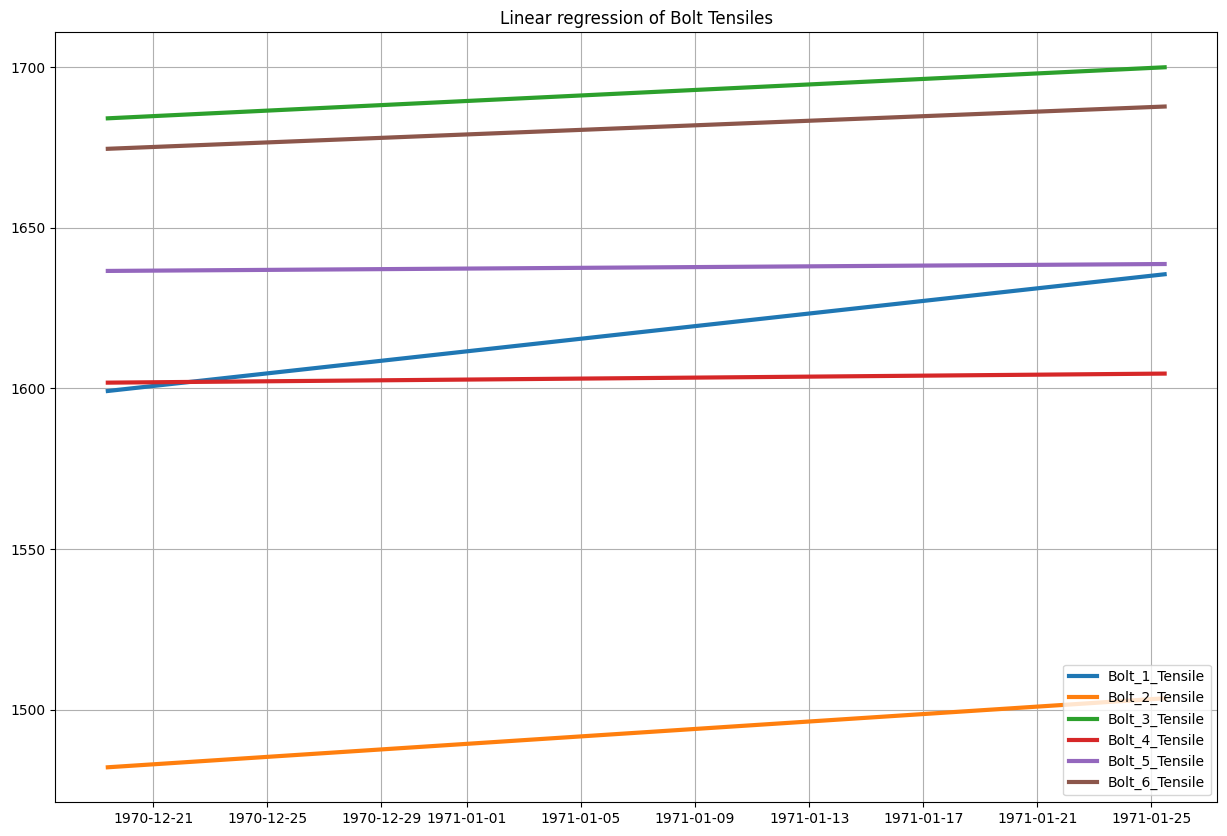

In [15]:
# Fit a linear curve on Bolt Tensile measurements.
from sklearn import linear_model

regressions = {}

for tensile_column in tensile_columns:
    regr = linear_model.LinearRegression()
    regr.fit(input_dataset_2.dropna(subset=[tensile_column])['TimeDiff'].to_numpy().reshape(-1, 1), input_dataset_2.dropna(subset=[tensile_column])[tensile_column].values)
    regressions[tensile_column] = regr

plt.figure(figsize=(15,10))
for tensile_column in regressions:
    print(f'Tensile {tensile_column} coefficient: {regressions[tensile_column].coef_[0]}')
    plt.plot(
        input_dataset_2.dropna(subset=[tensile_column])['DateTime'],
        regressions[tensile_column].predict(input_dataset_2.dropna(subset=[tensile_column])['TimeDiff'].to_numpy().reshape(-1, 1)),
        label=tensile_column,
        linewidth=3
    )
plt.grid()
plt.title('Linear regression of Bolt Tensiles')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

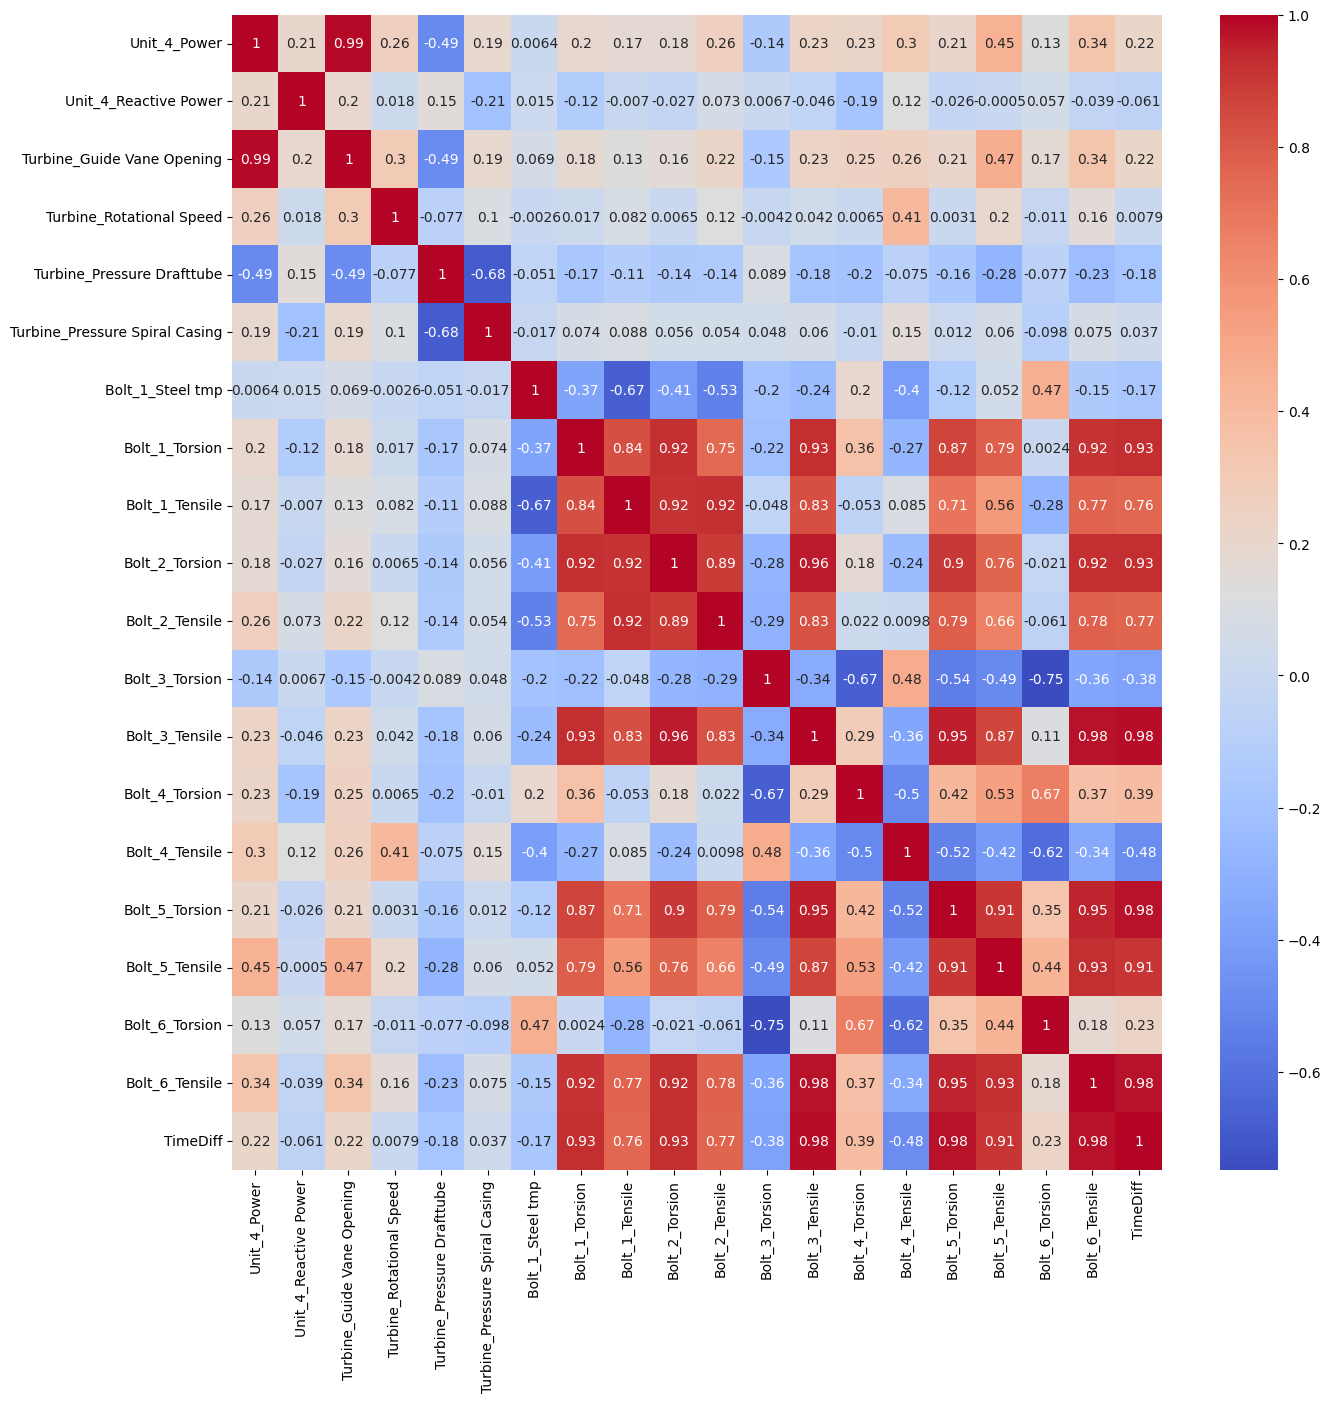

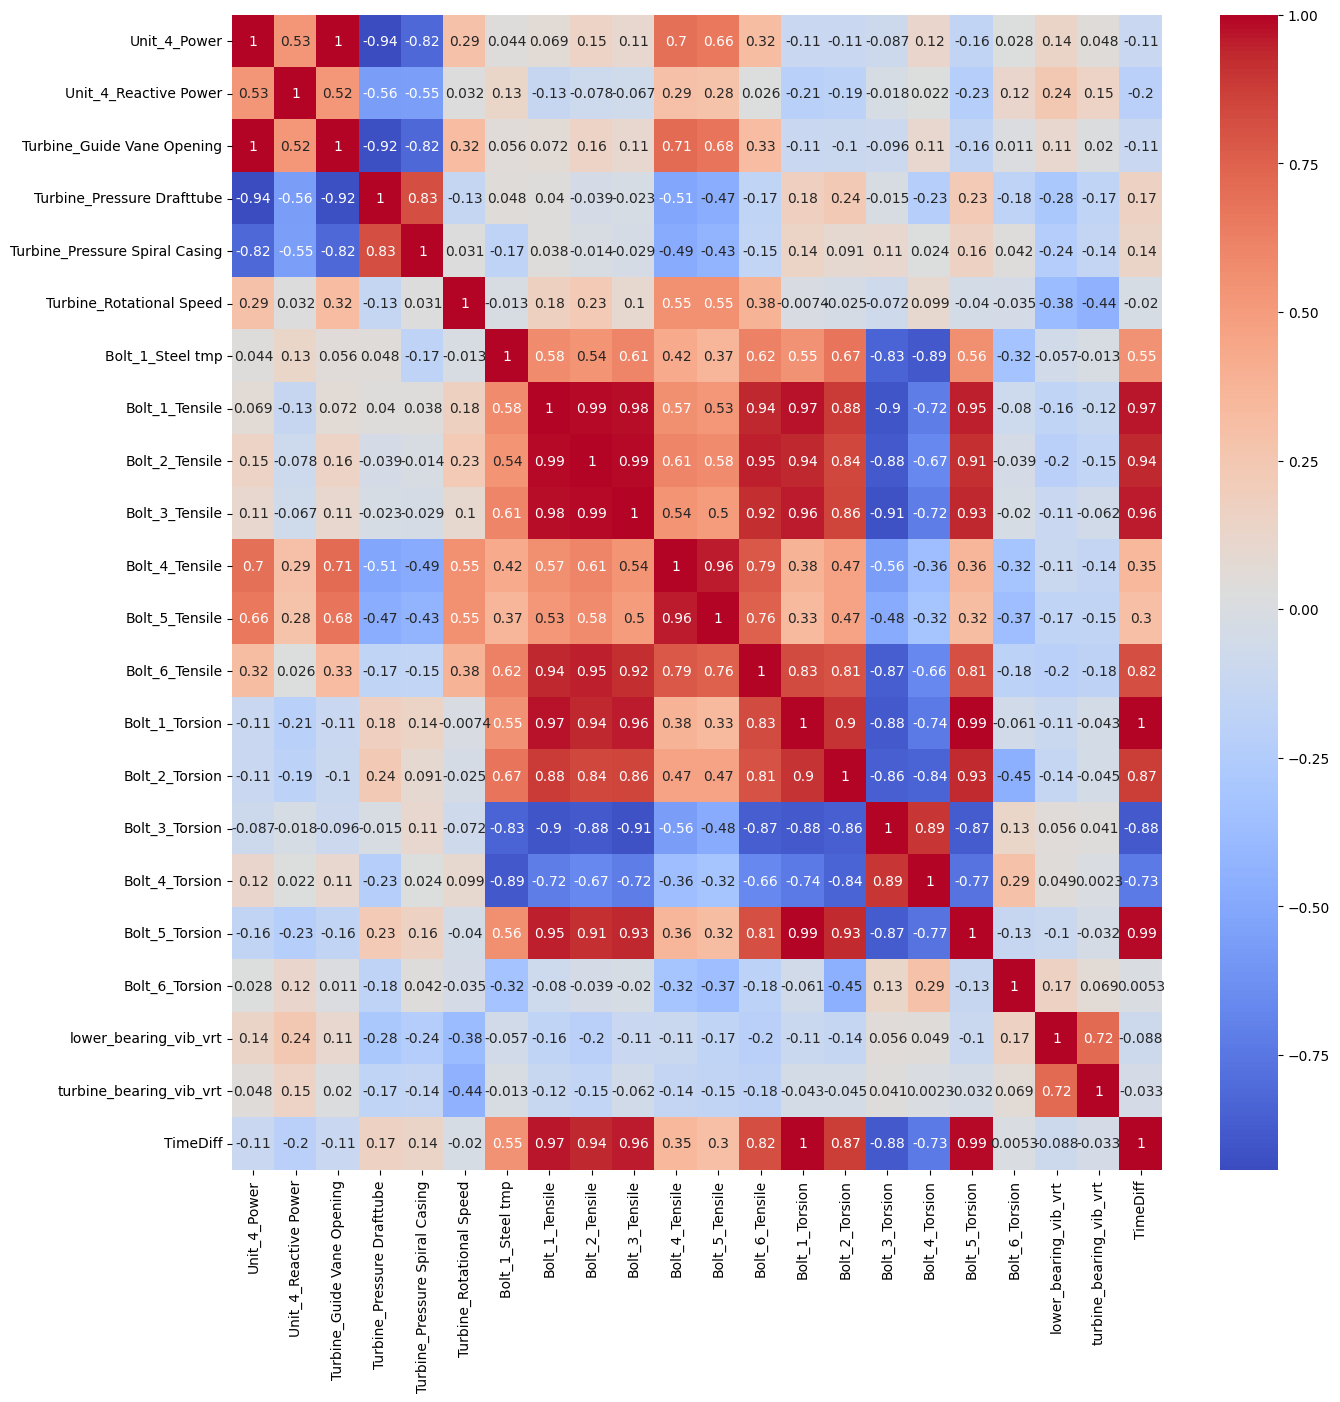

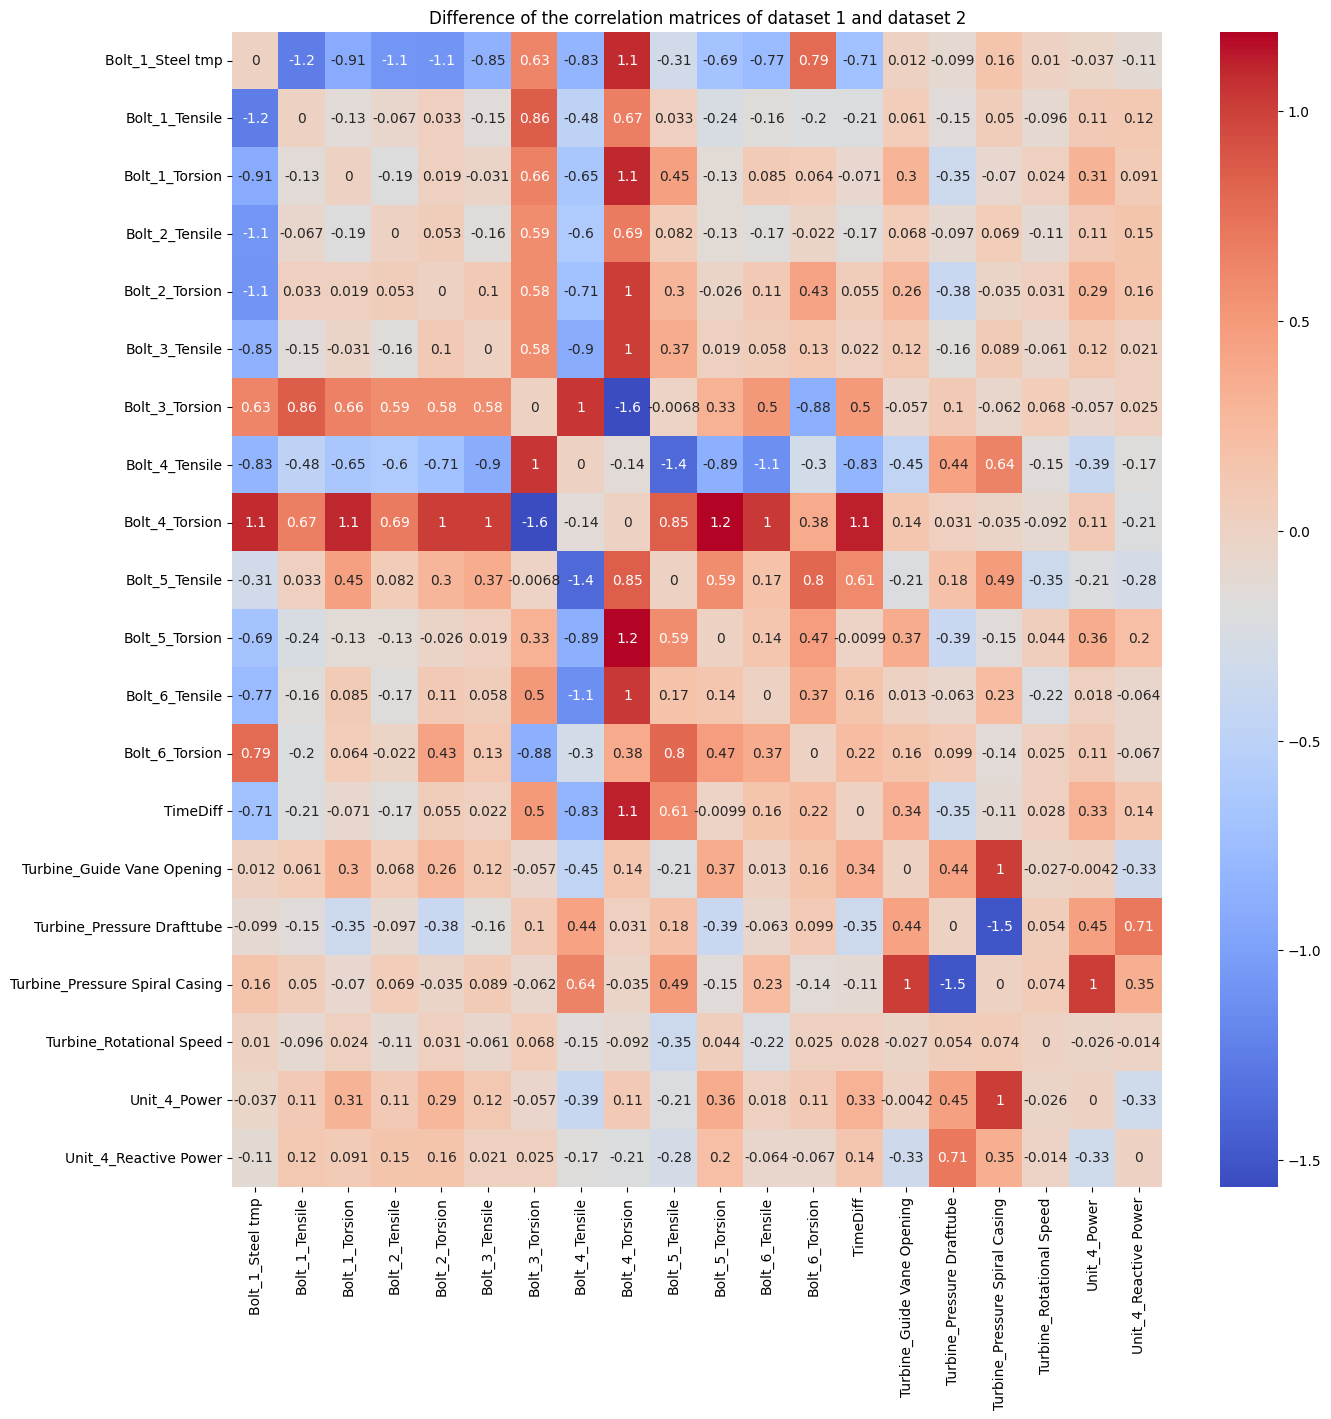

In [26]:
# Correlation matrix of input_dataset_1
plt.figure(figsize=(15,15))
sn.heatmap(input_dataset_1.corr(), annot=True, cmap="coolwarm")
plt.show()

# Correlation matrix of input_dataset_2
plt.figure(figsize=(15,15))
sn.heatmap(input_dataset_2.corr(), annot=True, cmap="coolwarm")
plt.show()

plt.figure(figsize=(15,15))
sn.heatmap(input_dataset_1.corr()-input_dataset_2.loc[:,~input_dataset_2.columns.isin(['lower_bearing_vib_vrt', 'turbine_bearing_vib_vrt'])].corr(), annot=True, cmap="coolwarm")
plt.title('Difference of the correlation matrices of dataset 1 and dataset 2')
plt.show()

In [27]:
plt.figure(figsize=(15,10))
ax = plt.axes()
for tensile_column in tensile_columns:
    ax.scatter(input_dataset_2['TimeDiff'], input_dataset_2[tensile_column] - bolt_pretensions[tensile_column], label=tensile_column, alpha=0.01)
    #ax.plot(input_dataset_2.dropna(subset=[tensile_column])['TimeDiff'], regressions[tensile_column].predict((input_dataset_2.dropna(subset=[tensile_column])['TimeDiff']  - bolt_pretensions[tensile_column]).to_numpy().reshape(-1, 1)), label=tensile_column, linewidth=3)
plt.grid()
plt.legend()
plt.title('Tensile load drift as a function of elapsed minutes')
plt.xlabel('Elapsed minutes since the start')
plt.ylabel('Tensile offset')
plt.show()

### Run clustering / classification / other analysis

In [24]:
# Export the results as a csv file.
ys = {}
x = prediction_dataset['DateTime']
for tensile_column in tensile_columns:
    y = regressions[tensile_column].predict(prediction_dataset['Second'].to_numpy().reshape(-1, 1))
    ys[tensile_column] = y

result_df = pd.DataFrame(
    {
        'timepoints': x,
        'Bolt_1_Tensile': ys['Bolt_1_Tensile'],
        'Bolt_2_Tensile': ys['Bolt_2_Tensile'],
        'Bolt_3_Tensile': ys['Bolt_3_Tensile'],
        'Bolt_4_Tensile': ys['Bolt_4_Tensile'],
        'Bolt_5_Tensile': ys['Bolt_5_Tensile'],
        'Bolt_6_Tensile': ys['Bolt_6_Tensile']
    }
)
result_df = result_df.drop(columns=['timepoints'])
display(result_df)

,Bolt_1_Tensile,Bolt_2_Tensile,Bolt_3_Tensile,Bolt_4_Tensile,Bolt_5_Tensile,Bolt_6_Tensile
timepoints,,,,,,
1971-01-25 11:06:49,1635.55,1503.52,1699.99,1604.62,1638.74,1687.77
1971-01-25 11:06:50,1635.55,1503.52,1699.99,1604.62,1638.74,1687.77
1971-01-25 11:06:51,1635.55,1503.52,1699.99,1604.62,1638.74,1687.77
1971-01-25 11:06:52,1635.55,1503.52,1699.99,1604.62,1638.74,1687.77
1971-01-25 11:06:53,1635.55,1503.52,1699.99,1604.62,1638.74,1687.77
...,...,...,...,...,...,...
1971-02-03 20:16:19,1644.75,1508.96,1704.02,1605.34,1639.28,1691.11
1971-02-03 20:16:20,1644.75,1508.96,1704.02,1605.34,1639.28,1691.11
1971-02-03 20:16:21,1644.75,1508.96,1704.02,1605.34,1639.28,1691.11


### Visualize results

Tensile Bolt_1_Tensile coefficient: 1.1352170009724203e-05
Tensile Bolt_2_Tensile coefficient: 6.708208824478634e-06
Tensile Bolt_3_Tensile coefficient: 4.964145681420958e-06
Tensile Bolt_4_Tensile coefficient: 8.80457924166373e-07
Tensile Bolt_5_Tensile coefficient: 6.719350091386681e-07
Tensile Bolt_6_Tensile coefficient: 4.1105414055024295e-06


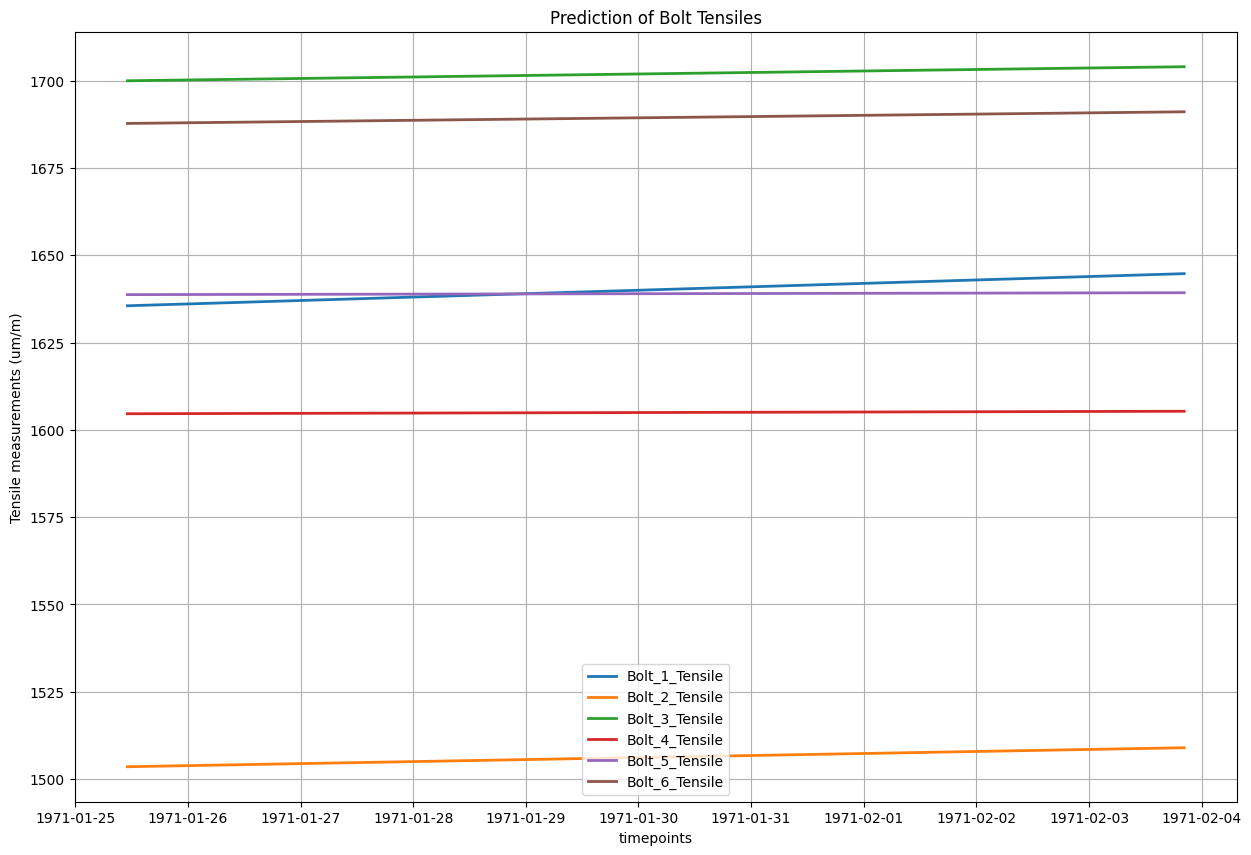

In [25]:
# Plot predictions of the Bolt Tensiles.
plt.figure(figsize=(15,10))
for tensile_column in regressions:
    print(f'Tensile {tensile_column} coefficient: {regressions[tensile_column].coef_[0]}')
    plt.plot(prediction_dataset['DateTime'], regressions[tensile_column].predict(prediction_dataset['Second'].to_numpy().reshape(-1, 1)), label=tensile_column, linewidth=2)
plt.grid()
plt.title('Prediction of Bolt Tensiles')
plt.xlabel('timepoints')
plt.ylabel('Tensile measurements (um/m)')
plt.legend()
plt.show()

### Export results

In [ ]:
result_df.to_csv('output/results.csv')